In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# x = x * 2 - растянем по x
# y = y * 0.5 - сожмём по y
# z = 0.1 * x - наклоним от x

N = [[2.0,  0.0],
     [0.0,  0.5]]

M = [[0.866, 0.5],
     [-0.5, 0.866]]

M = np.matrix(M) * np.matrix(N)
# M = np.matrix(M)

[[-0.86601905  0.500011  ]	[[ 1.999956  0.      ]	[[-1. -0.]
 [ 0.500011    0.86601905]]	 [ 0.        0.499989]]	 [ 0.  1.]]


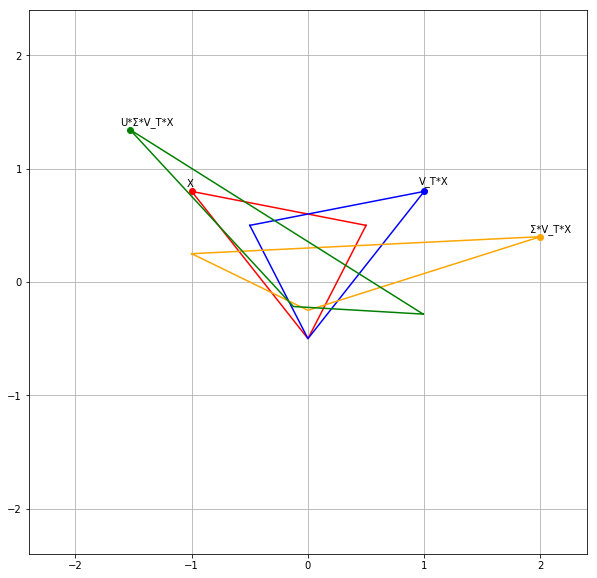

In [8]:
U, s, V_T = svd(M)
Σ = np.zeros((U.shape[1], V_T.shape[0]), dtype=float)
Σ[:V_T.shape[0], :V_T.shape[0]] = np.diag(s)

print_matrix = '\n'.join(
    map(
        lambda a, b, c: "{}\t{}\t{}".format(a, b, c), str(U).split('\n'), str(Σ).split('\n'), str(V_T).split('\n')))
print(print_matrix)

plt.figure(figsize=(10,10))
plt.xlim(-2.4, 2.4)
plt.ylim(-2.4, 2.4)

points = np.matrix([[0.5, 0.5], [-1, 0.8], [0, -0.5], [0.5, 0.5]]).T
plt.plot(points[0].A[0], points[1].A[0], color='red')
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], 'o', color='red')
plt.annotate('X',xy=points[:,1], xytext=(-5, 5), textcoords='offset points')
points = V_T * points
plt.plot(points[0].A[0], points[1].A[0], color='blue')
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], 'o', color='blue')
plt.annotate('V_T*X',xy=points[:,1], xytext=(-5, 8), textcoords='offset points')
points = Σ * points
plt.plot(points[0].A[0], points[1].A[0], color='orange')
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], 'o', color='orange')
plt.annotate('Σ*V_T*X',xy=points[:,1], xytext=(-10, 5), textcoords='offset points')
points = U * points
plt.plot(points[0].A[0], points[1].A[0], color='green')
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], 'o', color='green')
plt.annotate('U*Σ*V_T*X',xy=points[:,1], xytext=(-10, 5), textcoords='offset points')
plt.grid(True)
plt.show()